# Exercício 23 MiniBoss - Coop

## - Carregar os Dados (do Discord): credit_scoring_eng
## - Realize a Análise Exploratória: Utilize funções para verificar a estrutura do conjunto de dados (ex: head(), info()). Descreva brevemente o que cada coluna significa.

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

credit_scoring_eng = pd.read_csv('credit_scoring_eng.csv')
credit_scoring_eng

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [84]:
credit_scoring_eng.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [85]:
credit_scoring_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


#### Número de Colunas: 12
- children - Coluna que conta a quantidade de filhos da pessoa.
- days_employed - Conta os dias que a pessoa está empregada (com os valores positivos) e se está desempregada (valores negativos).
- dob_years - Refere-se à data de nascimento da pessoa, mas contada em anos.
- education - A formação mais alta de ensino que a pessoa têm.
- education_id - refere-se ao id de cada tipo de ensino registrado, sendo 0 = masters degree, 1 = secondary education, 2 = bachelor degree, 3 = primary education, 4 = academic degree.
- family_status - Coluna que se refere ao status familiar da pessoa.
- family_status_id - refere-se ao id de cada tipo de status familiar, sendo 0 = married, 1 = civil partnership, 2 = widow / widower, 3 = divorced, 4 = unmaried.
- gender - Coluna que se relaciona ao gênero da pessoa, M = male, F = female.
- income_type - o tipo de renda da pessoa.
- debt - se a pessoa está em dívida, sendo 0 para não e 1 para sim.
- total_income - a renda total da pessoa.
- purpose - o motivo para aumentar seu limite de crédito.

## Limpeza dos Dados: Identifique valores ausentes em cada coluna. 
- Quais colunas tem valores ausentes?

In [86]:
credit_scoring_eng.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

### As colunas days_employed e total_income possuem colunas nulas

- Qual percentual de valores ausentes para cada coluna?

In [87]:
null_percentage = credit_scoring_eng.isna().sum() / len(credit_scoring_eng)
null_percentage

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

### As colunas com valores nulos possuem uma porcentagem de 0.1% de valores nulos

## Gere um gráfico heatmap no Seaborn para visualizar os valores ausentes. Eles seguem algum padrão? Qual melhor maneira de lidar com esses dados ausentes e pq?

Text(0.5, 1.0, 'Mapa de calor dos valores ausentes')

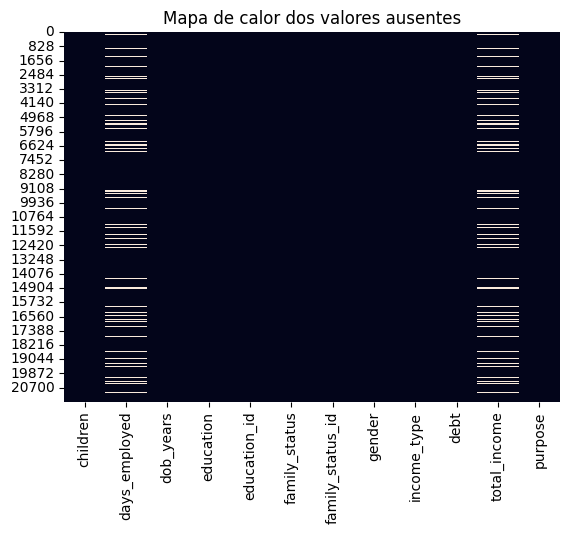

In [88]:
sns.heatmap(credit_scoring_eng.isna(), cbar=False)
plt.title('Mapa de calor dos valores ausentes')

### Eles seguem um padrão onde a pessoa que tem dias nulos como empregada, também possui renda total nula pois não recebe dinheiro de nenhuma fonte de emprego. A melhor maneira seria não derrubar esses dados, mas substituir por zero para entrar na ideia de ser alguém desempregado.

## Tratamento de Dados Inválidos:
 Verifique se há Outliers e os dados estatísticos da coluna 
“children” e  “days_employed” trate-os adequadamente. Qual 
melhor maneira de lidar com os outliers dessa coluna e pq?

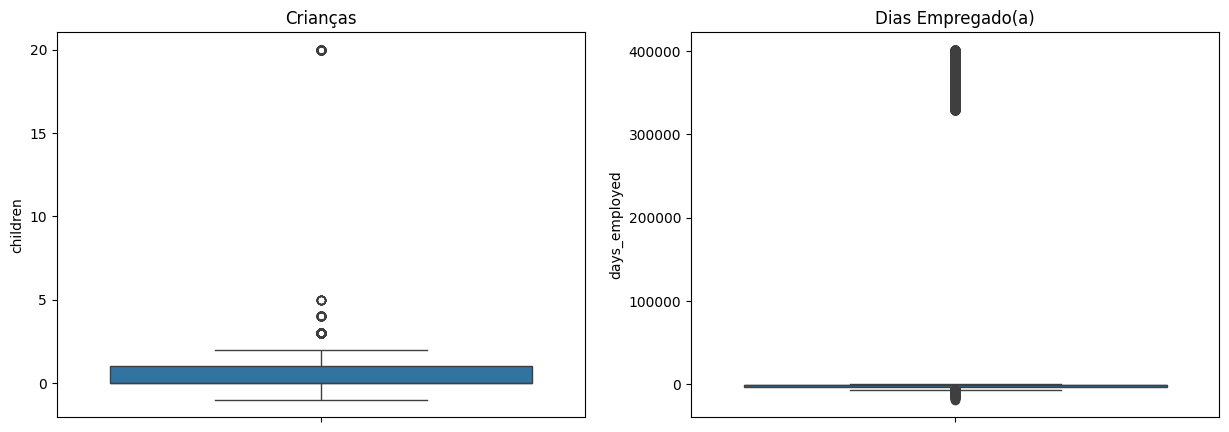

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(y=credit_scoring_eng['children'], ax=axes[0])
axes[0].set_title('Crianças')

sns.boxplot(y=credit_scoring_eng['days_employed'], ax=axes[1])
axes[1].set_title('Dias Empregado(a)')

plt.show()

### A melhor maneira seria filtrar e retirar os dados que estão fora da média e da curva de mínimo e máximo

In [110]:
df_without_outliers = credit_scoring_eng[(credit_scoring_eng['days_employed'] < 0) & (credit_scoring_eng['days_employed'] > -5000.000) & (credit_scoring_eng['children'] < 3)]

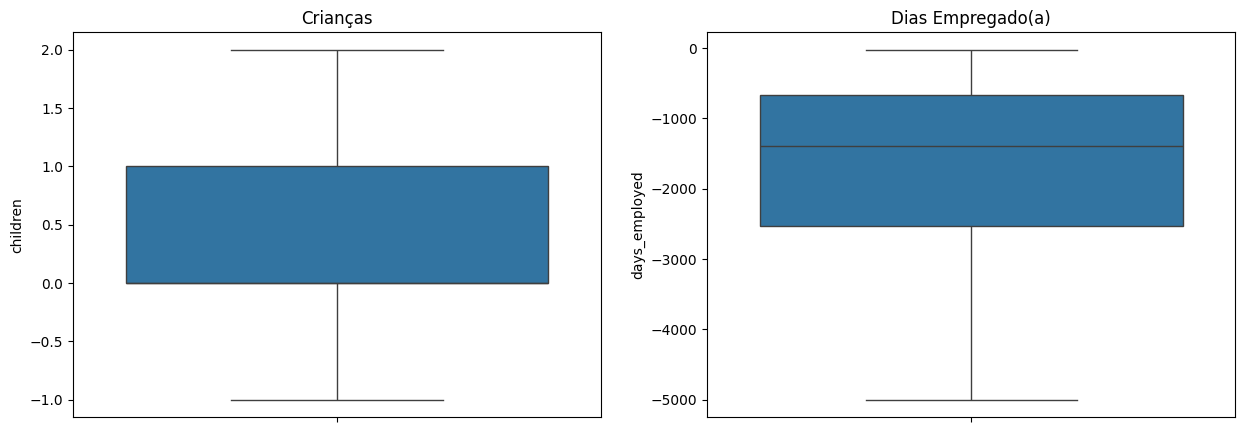

In [109]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

sns.boxplot(y=df_without_outliers['children'], ax=axes[0])
axes[0].set_title('Crianças')

sns.boxplot(y=df_without_outliers['days_employed'], ax=axes[1])
axes[1].set_title('Dias Empregado(a)')

plt.show()

### Agora notamos que não existem outliers em nenhuma das colunas

## Remova dados duplicados:
Verifique se há dados duplicados, se tiver remova eles e reset o 
index

In [111]:
credit_scoring_eng.duplicated().sum()

np.int64(54)

## Existem 54 dados duplicados

In [ ]:
#derruba os valores duplicados
dropped_duplicates = credit_scoring_eng.drop_duplicates()

#reseta o index sem criar uma coluna nova dos indexes
dropped_duplicates.reset_index(drop=True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21467,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21468,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21469,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [ ]:
dropped_duplicates['family_status']

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [131]:
dropped_duplicates[['children', 'debt']].corr()

,children,debt
children,1.000000,0.018336
debt,0.018336,1.000000


In [133]:
dropped_duplicates[['family_status_id', 'debt']].corr()

,family_status_id,debt
family_status_id,1.000000,0.020389
debt,0.020389,1.000000


# Exercício MiniBoss- Coop 
## Carregar os Dados (do Discord): games.cvs

### Realize transformação dos dados: Utilize funçõao groupby() para agrupar os dados por platform e year